#### **This Notebook Explores the Use of Dimensionality Reduction through PCA and LDA**

In [1]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GroupKFold, cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
import sys
sys.path.append('..')
from Cleaning_and_Evaluation import *

In [2]:
#df = pd.read_csv("../data/exosomes.raw_spectrum_1.csv")
df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../data/current_clean_spectrum.csv")

In [3]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,293,400.22778,1765.6628,201210-1,Normal
1,201210-1-00,294,400.91116,1774.7809,201210-1,Normal
2,201210-1-00,295,401.59454,1769.0302,201210-1,Normal
3,201210-1-00,296,402.27789,1756.4220,201210-1,Normal
4,201210-1-00,297,402.96127,1758.8690,201210-1,Normal
...,...,...,...,...,...,...
6239200,210526-3-09,2337,1797.03870,1617.3926,210526-3,Hyperglycemia
6239201,210526-3-09,2338,1797.72200,1633.0911,210526-3,Hyperglycemia
6239202,210526-3-09,2339,1798.40550,1633.3076,210526-3,Hyperglycemia
6239203,210526-3-09,2340,1799.08890,1641.8665,210526-3,Hyperglycemia


Clean with standard parameters.

In [4]:
spectra_cleaning(df)

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

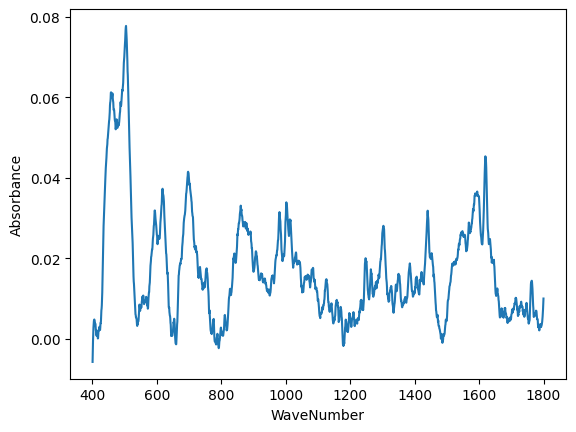

In [5]:
sample = df[df['SpecID'] == "201210-1-07"]
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

In [6]:
et = ExtraTreesClassifier(random_state=1234)
svc = SVC(random_state=1234)

In [7]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [8]:
wavelength_df.head()

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,SurID,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,0.018836,0.017018,0.015626,0.014620,0.013957,0.013595,0.013493,0.013607,0.013897,0.014320,...,0.011467,0.011340,0.010818,0.009837,0.008333,0.006242,0.003501,0.000044,201210-1,Normal
201210-1-01,0.006818,0.007851,0.008672,0.009304,0.009770,0.010093,0.010296,0.010402,0.010434,0.010414,...,0.007621,0.007526,0.007602,0.007896,0.008451,0.009313,0.010528,0.012140,201210-1,Normal
201210-1-02,0.008443,0.007880,0.007373,0.006922,0.006527,0.006189,0.005908,0.005685,0.005520,0.005414,...,0.001663,0.001841,0.001976,0.002050,0.002046,0.001945,0.001729,0.001380,201210-1,Normal
201210-1-03,0.001885,0.002656,0.003235,0.003642,0.003896,0.004015,0.004018,0.003923,0.003750,0.003518,...,0.000473,0.000574,0.000736,0.000963,0.001261,0.001637,0.002095,0.002640,201210-1,Normal
201210-1-04,0.017577,0.016497,0.015381,0.014247,0.013111,0.011991,0.010903,0.009864,0.008892,0.008002,...,0.000251,0.000057,0.000170,0.000665,0.001615,0.003092,0.005169,0.007921,201210-1,Normal


Show the performance of the current approach.

In [9]:
evaluate_model(wavelength_df, et)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ExtraTreesClassifier Cross-Validation Accuracy: 0.5668 +/- 0.1168
ExtraTreesClassifier Cross-Validation Precision: 0.5777 +/- 0.1191
ExtraTreesClassifier Cross-Validation Recall: 0.5860 +/- 0.1527
ExtraTreesClassifier Cross-Validation F1-Score: 0.5471 +/- 0.1313


In [10]:
evaluate_model(wavelength_df, svc)

/home/eddie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC Cross-Validation Accuracy: 0.5629 +/- 0.0954
SVC Cross-Validation Precision: 0.5628 +/- 0.0981
SVC Cross-Validation Recall: 0.5698 +/- 0.1326
SVC Cross-Validation F1-Score: 0.5379 +/- 0.1079


---

##### **PCA**

In [11]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=50)),
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

ExtraTreesClassifier Cross-Validation Accuracy: 0.5272 +/- 0.0861


In [12]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=100)),
    ('classifier', SVC(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

SVC Cross-Validation Accuracy: 0.5544 +/- 0.0977


##### **LDA**

In [13]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Updated pipeline with LDA
pipeline = Pipeline([
    ('lda', LDA()),
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks with the updated pipeline
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results for LDA
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

ExtraTreesClassifier Cross-Validation Accuracy with LDA: 0.4309 +/- 0.0501


In [14]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Updated pipeline with LDA
pipeline = Pipeline([
    ('lda', LDA()),
    ('classifier', SVC(random_state=1234))
])

# Using GroupKFold for classification tasks with the updated pipeline
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results for LDA
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

SVC Cross-Validation Accuracy with LDA: 0.4300 +/- 0.0749


##### **PCA + LDA**

In [15]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA, LDA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=50)),  # First, apply PCA
    ('lda', LDA()),                  # Then apply LDA
    ('classifier', ExtraTreesClassifier(random_state=1234))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with PCA and LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')

ExtraTreesClassifier Cross-Validation Accuracy with PCA and LDA: 0.4821 +/- 0.0842


In [16]:
# Set the Surfaces as groups
groups = wavelength_df['SurID']
X = wavelength_df.drop(['Status', 'SurID'], axis=1)
y = wavelength_df['Status']

# Create a pipeline with PCA, LDA and Extra Trees classifier
pipeline = Pipeline([
    ('pca', PCA(n_components=50)),  # First, apply PCA
    ('lda', LDA()),                  # Then apply LDA
    ('classifier', SVC(random_state=1234, C=10000))
])

# Using GroupKFold for classification tasks
cv = GroupKFold(n_splits=10)

# Getting cross-validation scores
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy', groups=groups, n_jobs=-1)

# Displaying the results
print(f'{pipeline.steps[-1][1].__class__.__name__} Cross-Validation Accuracy with PCA and LDA: {np.mean(scores):.4f} +/- {np.std(scores):.4f}')